# Ch 10-5. 상관분석

상관분석은 두 연속형 변수가 어떤 관계가 있는지 보는 방법이고, 카이제곱검정은 두 범주형 변수가 어떤 관계가 있는지 보는 방법이라고 생각하면 된다.  
관계라는 것은 값 간의 음 양 등의 상관 관계나 독립성을 의미한다. 

## 상관분석 개요
- 목적: 두 연속형 변수 간에 어떠한 선형 관계를 가지는지 파악.  
일반적으로 가설을 수립하여 검정한다기보다, 통계량을 바탕으로 시각화하여 관계가 있다 없다를 보는 것이 더 일반적이다.

- 영 가설과 대립 가설  
$H_0$ : 두 변수 간에는 유의미한 상관성이 존재하지 않는다  
$H_1$ : 두 변수 간에는 유의미한 상관성이 존재한다  

- 시각화 방법 : 산점도(scatter plot)

## 피어슨 상관 계수
가장 많이 사용되는 상관계수는 피어슨 상관 계수이다. 두 변수 모두 연속형 변수일 때 사용할 수 있고, 범주형일 때도 사용은 가능할 수 있지만 유의미한 정보를 얻기엔 어렵다.  

$$ p_{x, y} = \frac {\mathrm{Cov}{(x, y)}} {\sqrt {\mathrm{Var}{(x)} \times {\mathrm{Var}{(y)}}} } $$  
- 공분산은 $x$와 $y$가 같이 움직이는 정도라고 보면 되고, 분모에는 $x$와 $y$의 분산의 곱에 루트를 취한 것으로 되어있다. 각각의 분산이 적을 수록, 그리고 같이 움직이는 정도가 클 수록 통계량이 높아진다.  
- 그리고 이 통계량은 $-1$ 부터 $1$ 사이를 가지며, $1$에 가까울 수록 양의 상관관계, $-1$에 가까울 수록 음의 상관관계가 강하다고 할 수 있다.  
- 절대값이 0에 가까울 수록 상관관계가 약하다고 볼 수 있다.  

머신러닝에서는 상관관계가 1이면 x가 주어졌을 때 y를 정확하게 예측할 수 있다고 보기도 한다. (물론 이런 자연 데이터를 만날 확률은 거의 없다.) 0은 예측이 불가능한 상태라고 생각할 수 있다.   

선형 관게는 반드시 선으로 이어졌는지 아닌지를 본다는 것이며, 만약 선이 아니라 2차식이면 피어슨 상관계수로 측정이 불가능하다.

## 스피어만 상관 계수
두 변수의 순위 사이의 단조 관련성을 측정하는 상관 계수이다. 흔하게 쓰이지는 않지만, 순위에 대한 상관계수를 구할 때 사용한다. 값이 아니라 오름차순으로 매긴 상태를 사용한다.  

$$ S_{x, y} = p_{r(x), r(y)} $$

피어슨 상관계수와 비슷하지만, $x$와 $y$의 순위를 이용한다는 것에서 다르다.  

피어슨 상관계수로 직선으로 증가한다고 보기는 어렵지만, 스피어만 상관 계수는 곡선이라 하더라도 증감 자체를 보는 것이라고 할 수 있다. 그래서 단조 관련성을 측정한다고 하는 것이다.  

피어슨 상관계수가 조금 낮지만 스피어만 상관계수가 1에 가까이 높다면 선형관계는 아니지만 x가 증가하면 y도 증가한다는 관계를 알 수 있다.  

## 파이썬을 이용한 상관분석

x와 y를 넣는 순서는 중요하지 않다.  

- 피어슨 상관계수 계산  
```
scipy.stats.perasonr(x, y)
```
    result = (statistics, pvalue)  
    statistics = 피어슨 상관계수  
    pvalue = 0.05 미만이면 유의한 상관성이 있다고 봄  
- 스피어만 상관계수 계산  
```
scipy.stats.spearmanr(x, y). 
```
    result = (statistics, pvalue)  
    statistics = 스피어만 상관계수  
    pvalue = 0.05 미만이면 유의한 상관성이 있다고 봄  
- 상관 행렬  
```
DataFrame.corr(method)    # method = {pearson, spearman}
```
    컬럼 간 상관계수를 나타내는 행렬

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *

import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/2. 탐색적 데이터 분석/데이터")

print(pd.__version__)
print(np.__version__)

1.4.1
1.22.4


## 과제 : 금과 은과 달러 간의 상관성 분석 

In [3]:
df = pd.read_excel("일별_금은달러.xlsx")
df.head()

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


In [4]:
# 일자 순서대로 오름차순 정렬 및 저장
df.sort_values(by = '일자', inplace = True)

In [22]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (6, 6)

처음부터 끝까지, 일자 틱을 8개씩 건너뛰며 그리도록 하는데, tick에 시리즈가 들어가는 경우 인덱스가 위치가 되고 값이 틱의 이름 즉 라벨이 된다. 

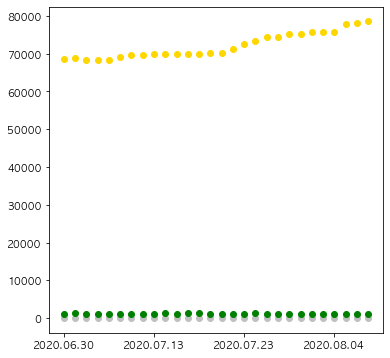

In [23]:
plt.scatter(df['일자'], df['금값'], c = 'gold')
plt.scatter(df['일자'], df['은값'], c = 'silver')
plt.scatter(df['일자'], df['달러 환율'], c = 'g')
plt.xticks(df['일자'].iloc[::8])
plt.show()

### 둘의 관계를 보기 위해 각각 x와 y축으로 하는 산점도 그리기

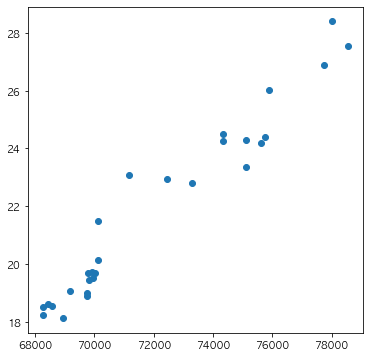

In [24]:
plt.figure(figsize = (6, 6))
plt.scatter(x = df['금값'], y = df['은값'])
plt.show()

### scatter_matrix 
컬럼들에 대한 scatter matrix를 그려준다.   
자기 스스로에 대해서는 의미없는 히스토그램이 나오게 된다.  

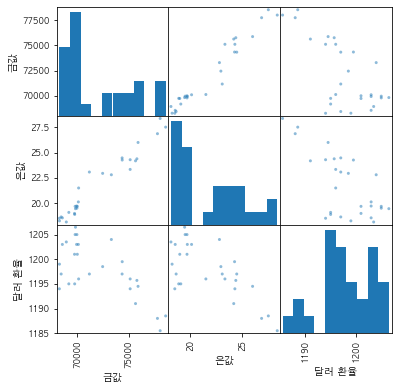

In [25]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))
plt.show()

### 확실하게 해석되지 않는 부분들에 대해 상관계수 구해보기

#### 피어슨 상관계수

In [26]:
from scipy.stats import *
print(pearsonr(df['금값'], df['은값']))
print(pearsonr(df['금값'], df['달러 환율']))
print(pearsonr(df['은값'], df['달러 환율']))

(0.9718640116033498, 7.508878356556557e-18)
(-0.6793266264341937, 7.033325258452259e-05)
(-0.6954569556203559, 3.989042061957972e-05)


금값과 은값은 확실한 양의 상관관계가 있다.  
그리고 pvalue도 0.05 미만으로 굉장히 작은 것을 볼 수 있다.  
그러나 달러 환율과 금값, 은값은 음의 상관관계가 있다.  

#### 컬럼 개수가 많을 때 itertools.combinations 사용하여 둘 씩 뽑기

.format 을 사용하여 깔끔하게 사용한다. round를 각각 적용하여 다듬어도 좋다.  

In [27]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = pearsonr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9718640116033498, p-value: 7.508878356556557e-18
금값 ~ 달러 환율: coef:-0.6793266264341937, p-value: 7.033325258452259e-05
은값 ~ 달러 환율: coef:-0.6954569556203559, p-value: 3.989042061957972e-05


#### 스피어만 상관계수 

스피어만 상관계수가 좀 더 작은 것을 보아 순위간의 관계는 크지 않음을 (값 자체로는 크지만 피어슨보다는 작기 때문에), 순위 매우 유의하지는 않다.

In [89]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9711235892228813, p-value: 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value: 0.006257468267109452
은값 ~ 달러 환율: coef:-0.528106006718531, p-value: 0.003869997604824081


In [92]:
df.drop('일자', axis = 1).corr(method = 'pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [91]:
df.drop('일자', axis = 1).corr(method = 'spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000
